<a href="https://colab.research.google.com/github/Geebigib/Data-Science-Project/blob/main/SWaT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
!unzip /content/drive/MyDrive/SWaT_Dataset_v0.zip -d /content/

Archive:  /content/drive/MyDrive/SWaT_Dataset_v0.zip
  inflating: /content/SWaT_Dataset_Attack_v0.csv  
  inflating: /content/SWaT_Dataset_Normal_v0.csv  


In [5]:
swat_normal = pd.read_csv("SWaT_Dataset_Normal_v0.csv", skiprows=1)
swat_attack = pd.read_csv("SWaT_Dataset_Attack_v0.csv")

In [6]:
swat_normal.columns = swat_normal.columns.str.replace(' ','')
swat_attack.columns = swat_attack.columns.str.replace(' ','')

In [7]:
swat_attack["Normal/Attack"].replace(' ', '', regex=True, inplace=True)

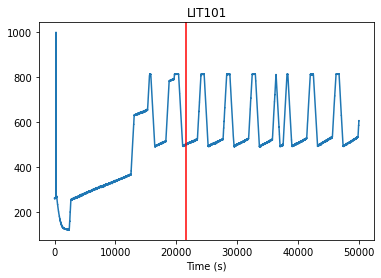

In [8]:
plt.plot(swat_normal.index[:50000],swat_normal["LIT101"][:50000], label='LIT101')
plt.xlabel("Time (s)")
plt.title("LIT101")
plt.axvline(21600,c="r")
plt.show()

In [9]:
swat_normal.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0
mean,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,1.744203,...,0.306141,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0
std,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,0.444554,...,0.025356,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0
min,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,0.000000,...,0.000000,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0
25%,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,1.000000,...,0.306633,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0
50%,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,2.000000,...,0.308362,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0
75%,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,2.000000,...,0.310284,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0
max,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,2.000000,...,0.317010,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0


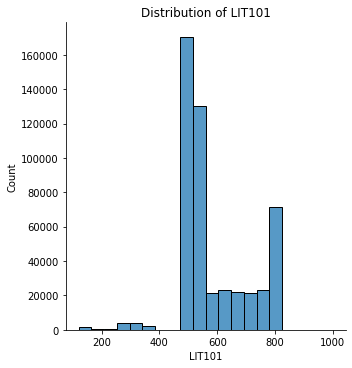

In [10]:
sns.displot(swat_normal, x="LIT101", bins=20)
plt.title("Distribution of LIT101")
plt.show()

In [11]:
len(swat_normal), len(swat_attack)

(496800, 449919)

In [12]:
len(swat_attack[swat_attack["Normal/Attack"] == "Attack"])

54621

In [13]:
num_att = len(swat_attack[swat_attack["Normal/Attack"] == "Attack"])*100/ (len(swat_normal)+len(swat_attack))

In [14]:
print(f'there are {np.round(num_att,2)} % of attack data')

there are 5.77 % of attack data


In [15]:
swat_attack.isnull().any()

Timestamp        False
FIT101           False
LIT101           False
MV101            False
P101             False
P102             False
AIT201           False
AIT202           False
AIT203           False
FIT201           False
MV201            False
P201             False
P202             False
P203             False
P204             False
P205             False
P206             False
DPIT301          False
FIT301           False
LIT301           False
MV301            False
MV302            False
MV303            False
MV304            False
P301             False
P302             False
AIT401           False
AIT402           False
FIT401           False
LIT401           False
P401             False
P402             False
P403             False
P404             False
UV401            False
AIT501           False
AIT502           False
AIT503           False
AIT504           False
FIT501           False
FIT502           False
FIT503           False
FIT504           False
P501       

In [16]:
swat_normal.isnull().any()

Timestamp        False
FIT101           False
LIT101           False
MV101            False
P101             False
P102             False
AIT201           False
AIT202           False
AIT203           False
FIT201           False
MV201            False
P201             False
P202             False
P203             False
P204             False
P205             False
P206             False
DPIT301          False
FIT301           False
LIT301           False
MV301            False
MV302            False
MV303            False
MV304            False
P301             False
P302             False
AIT401           False
AIT402           False
FIT401           False
LIT401           False
P401             False
P402             False
P403             False
P404             False
UV401            False
AIT501           False
AIT502           False
AIT503           False
AIT504           False
FIT501           False
FIT502           False
FIT503           False
FIT504           False
P501       

In [17]:
swat_normal.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

In [29]:
scaler = MinMaxScaler()
swat_normal_norm = scaler.fit_transform(swat_normal.drop(columns = ["Timestamp","Normal/Attack"]))

In [31]:
swat_normal_norm = pd.DataFrame(swat_normal_norm, columns = swat_normal.drop(columns = ["Timestamp","Normal/Attack"]).columns)

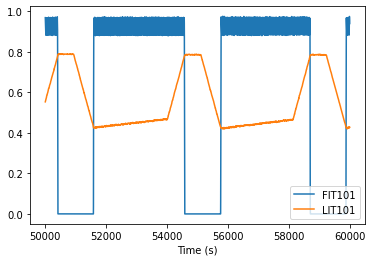

In [36]:
plt.plot(swat_normal_norm.index[50000:60000],swat_normal_norm["FIT101"][50000:60000], label='FIT101')
plt.plot(swat_normal_norm.index[50000:60000],swat_normal_norm["LIT101"][50000:60000], label='LIT101')
plt.xlabel("Time (s)")
# plt.title("")
plt.legend(loc='lower right')
plt.show()